**Exploratory Data Analysis**

by Annie Bishai

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [34]:
df = pd.read_csv('./clean_data/full_merged_data.csv')

In [35]:
df.shape

(3195, 34)

In [36]:
df.head()

,County_State,pct_hesitant_02-24-22,pct_somewhat_hesitant_02-24-22,pct_highly_hesitant_02-24-22,null_pct,uninsured_pct,socio_wgt,hh_wgt,minority_wgt,housing_wgt,...,Census2019_65PlusPop,Census2019_18to64Pop,state,candidate_won,pct_trump,pct_biden,hesitant_x_nzip,somewhat_hesitant_x_nzip,highly_hesitant_x_nzip,Census2019_Pct_65Plus
0,abbeville_sc,0.293,0.108,0.185,0.000000,0.115140,0.799646,0.793354,0.352214,0.674209,...,5483.0,14184.0,SC,1.0,0.661,0.339,3.809,1.404,2.405,0.223550
1,acadia parish_la,0.290,0.083,0.207,0.000000,0.113333,0.784556,0.737875,0.323409,0.709167,...,9796.0,36244.0,LA,1.0,0.795,0.205,4.350,1.245,3.105,0.157885
2,accomack_va,0.214,0.087,0.126,0.272727,0.166147,0.645936,0.652600,0.616317,0.677891,...,7934.0,17692.0,VA,1.0,0.541,0.459,7.062,2.871,4.158,0.245513
3,ada_id,0.165,0.037,0.128,0.000000,0.081482,0.311357,0.376415,0.336126,0.404814,...,71958.0,297899.0,ID,1.0,0.504,0.496,2.805,0.629,2.176,0.149418
4,adair_ia,0.290,0.059,0.231,0.000000,0.062184,0.304220,0.723457,0.057589,0.457924,...,1648.0,3945.0,IA,1.0,0.698,0.302,3.770,0.767,3.003,0.230425


In [37]:
df.drop(columns='state', inplace=True)

In [38]:
df.isna().sum()

County_State                       0
pct_hesitant_02-24-22             53
pct_somewhat_hesitant_02-24-22    53
pct_highly_hesitant_02-24-22      53
null_pct                          53
uninsured_pct                     53
socio_wgt                         53
hh_wgt                            53
minority_wgt                      53
housing_wgt                       53
overall_wgt                       53
FIPS                               4
Dose1_Pop_Pct_030121               4
Series_Complete_Pop_Pct_030121     4
Booster_Doses_Vax_Pct_030121       4
Dose1_Pop_Pct_090121               4
Series_Complete_Pop_Pct_090121     4
Booster_Doses_Vax_Pct_090121       4
Dose1_Pop_Pct_030122               4
Series_Complete_Pop_Pct_030122     4
Booster_Doses_Vax_Pct_030122       4
SVI_CTGY                          54
Metro_status                      54
Census2019                        53
Census2019_65PlusPop              53
Census2019_18to64Pop              53
candidate_won                     49
p

In [39]:
hesitant_na_ind = df[df['pct_hesitant_02-24-22'].isna() == True].index
df.drop(hesitant_na_ind).isna().sum()

County_State                      0
pct_hesitant_02-24-22             0
pct_somewhat_hesitant_02-24-22    0
pct_highly_hesitant_02-24-22      0
null_pct                          2
uninsured_pct                     2
socio_wgt                         2
hh_wgt                            2
minority_wgt                      2
housing_wgt                       2
overall_wgt                       2
FIPS                              3
Dose1_Pop_Pct_030121              3
Series_Complete_Pop_Pct_030121    3
Booster_Doses_Vax_Pct_030121      3
Dose1_Pop_Pct_090121              3
Series_Complete_Pop_Pct_090121    3
Booster_Doses_Vax_Pct_090121      3
Dose1_Pop_Pct_030122              3
Series_Complete_Pop_Pct_030122    3
Booster_Doses_Vax_Pct_030122      3
SVI_CTGY                          4
Metro_status                      3
Census2019                        3
Census2019_65PlusPop              3
Census2019_18to64Pop              3
candidate_won                     0
pct_trump                   

In [40]:
# Drop NaNs

df.dropna(inplace=True)

In [41]:
df.shape

(3138, 33)

# EDA

In [42]:
# Correlation of various things with trump percentage

trump_corr = df[['Census2019','Census2019_Pct_65Plus', 'Dose1_Pop_Pct_030121', 'Dose1_Pop_Pct_090121', 'Dose1_Pop_Pct_030122', 'pct_highly_hesitant_02-24-22', 'pct_trump']].corr()[['pct_trump']]
trump_corr

,pct_trump
Census2019,-0.354981
Census2019_Pct_65Plus,0.265349
Dose1_Pop_Pct_030121,-0.138891
Dose1_Pop_Pct_090121,-0.424841
Dose1_Pop_Pct_030122,-0.581053
pct_highly_hesitant_02-24-22,0.654665
pct_trump,1.000000


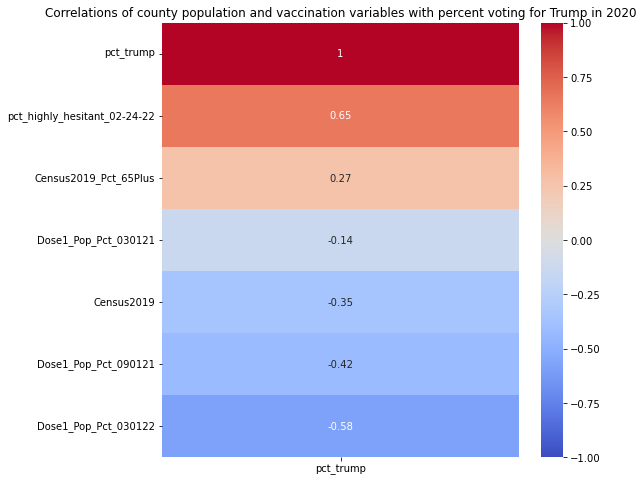

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(trump_corr.sort_values('pct_trump', ascending=False), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlations of county population and vaccination variables with percent voting for Trump in 2020');

In [44]:
df['SVI_CTGY'].value_counts()

1.0    786
4.0    785
3.0    784
2.0    783
Name: SVI_CTGY, dtype: int64

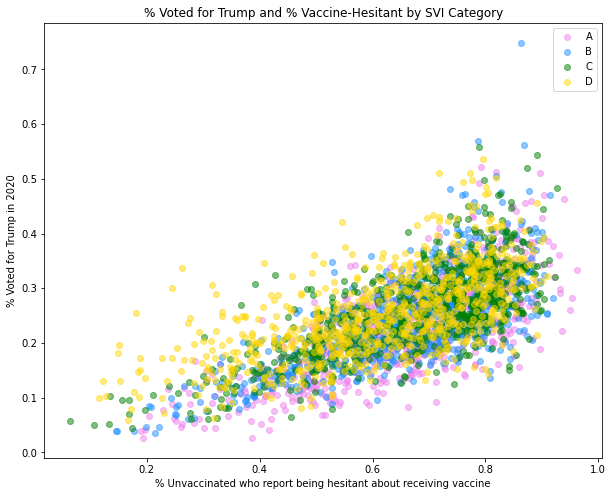

In [45]:
# Relationship btwn %pop over 65 and vax % in March 2021


fig, ax = plt.subplots(figsize=(10,8))
ctgys = [(1, 'A'), (2, 'B'), (3, 'C'), (4, 'D')]
colors = ['violet', 'dodgerblue', 'green', 'gold']
for n in range(4):
    x = df[df['SVI_CTGY'] == ctgys[n][0]]['pct_trump']
    y = df[df['SVI_CTGY'] == ctgys[n][0]]['pct_hesitant_02-24-22']
    ax.scatter(x, y, c=colors[n], alpha=.5, label=ctgys[n][1])
    ax.legend()
    ax.set_title('% Voted for Trump and % Vaccine-Hesitant by SVI Category')
    ax.set_xlabel('% Unvaccinated who report being hesitant about receiving vaccine')
    ax.set_ylabel('% Voted for Trump in 2020')
plt.savefig('./Graphs/TrumpUnvaxHesSVI.png')

In [46]:
df.columns

Index(['County_State', 'pct_hesitant_02-24-22',
       'pct_somewhat_hesitant_02-24-22', 'pct_highly_hesitant_02-24-22',
       'null_pct', 'uninsured_pct', 'socio_wgt', 'hh_wgt', 'minority_wgt',
       'housing_wgt', 'overall_wgt', 'FIPS', 'Dose1_Pop_Pct_030121',
       'Series_Complete_Pop_Pct_030121', 'Booster_Doses_Vax_Pct_030121',
       'Dose1_Pop_Pct_090121', 'Series_Complete_Pop_Pct_090121',
       'Booster_Doses_Vax_Pct_090121', 'Dose1_Pop_Pct_030122',
       'Series_Complete_Pop_Pct_030122', 'Booster_Doses_Vax_Pct_030122',
       'SVI_CTGY', 'Metro_status', 'Census2019', 'Census2019_65PlusPop',
       'Census2019_18to64Pop', 'candidate_won', 'pct_trump', 'pct_biden',
       'hesitant_x_nzip', 'somewhat_hesitant_x_nzip', 'highly_hesitant_x_nzip',
       'Census2019_Pct_65Plus'],
      dtype='object')

In [47]:
df[['uninsured_pct', 'socio_wgt', 'hh_wgt', 'minority_wgt',
       'housing_wgt', 'overall_wgt']].describe()

,uninsured_pct,socio_wgt,hh_wgt,minority_wgt,housing_wgt,overall_wgt
count,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000
mean,0.098214,0.548684,0.632450,0.334226,0.565987,0.540812
std,0.049878,0.185986,0.170981,0.208532,0.145422,0.172775
min,0.015236,0.041000,0.035500,0.001100,0.042500,0.030889
25%,0.060812,0.406546,0.525947,0.162078,0.474889,0.419158
50%,0.089496,0.550809,0.654013,0.299558,0.563605,0.535820
75%,0.123405,0.692402,0.757751,0.468717,0.661381,0.665305
max,0.455182,0.981420,0.998200,0.994638,0.985100,0.993770


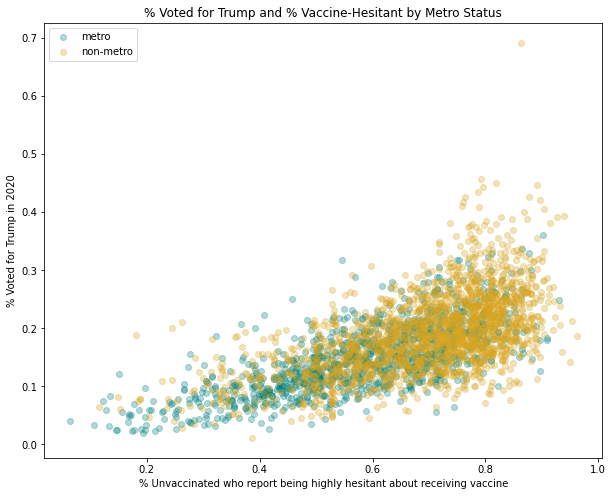

In [48]:
# Metro/non-metro

fig, ax = plt.subplots(figsize=(10,8))
ctgys = [(1, 'metro'), (0, 'non-metro')]
colors = ['teal', 'goldenrod']
for n in range(2):
    x = df[df['Metro_status'] == ctgys[n][0]]['pct_trump']
    y = df[df['Metro_status'] == ctgys[n][0]]['pct_highly_hesitant_02-24-22']
    ax.scatter(x, y, c=colors[n], alpha=.3, label=ctgys[n][1])
    ax.legend()
    ax.set_title('% Voted for Trump and % Vaccine-Hesitant by Metro Status')
    ax.set_xlabel('% Unvaccinated who report being highly hesitant about receiving vaccine')
    ax.set_ylabel('% Voted for Trump in 2020')
plt.savefig('./Graphs/TrumpUnvaxHes.png')

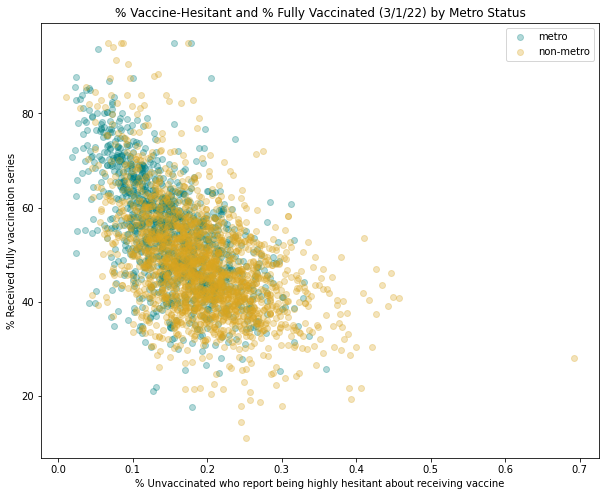

In [49]:
# % vaxxed and % vax-hesitant, metro/non-metro

fig, ax = plt.subplots(figsize=(10,8))
ctgys = [(1, 'metro'), (0, 'non-metro')]
colors = ['teal', 'goldenrod']
for n in range(2):
    x = df[(df['Metro_status'] == ctgys[n][0]) & (df['Series_Complete_Pop_Pct_030122'] > 0)]['pct_highly_hesitant_02-24-22']
    y = df[(df['Metro_status'] == ctgys[n][0]) & (df['Series_Complete_Pop_Pct_030122'] > 0)]['Series_Complete_Pop_Pct_030122']
    ax.scatter(x, y, c=colors[n], alpha=.3, label=ctgys[n][1])
    ax.legend()
    ax.set_title('% Vaccine-Hesitant and % Fully Vaccinated (3/1/22) by Metro Status')
    ax.set_xlabel('% Unvaccinated who report being highly hesitant about receiving vaccine')
    ax.set_ylabel('% Received fully vaccination series')
plt.savefig('./Graphs/SeriescompleteUnvaxHesMetro.png')

In [50]:
# Find outliner

df[(df['Metro_status'] == ctgys[n][0]) & (df['Series_Complete_Pop_Pct_030122'] > 0)].sort_values(by='pct_highly_hesitant_02-24-22', ascending=False).head(2)

# Wibaux County, MT - seems plausible

,County_State,pct_hesitant_02-24-22,pct_somewhat_hesitant_02-24-22,pct_highly_hesitant_02-24-22,null_pct,uninsured_pct,socio_wgt,hh_wgt,minority_wgt,housing_wgt,...,Census2019,Census2019_65PlusPop,Census2019_18to64Pop,candidate_won,pct_trump,pct_biden,hesitant_x_nzip,somewhat_hesitant_x_nzip,highly_hesitant_x_nzip,Census2019_Pct_65Plus
3099,wibaux_mt,0.749,0.058,0.692,0.0,0.142128,0.522300,0.947600,0.276900,0.551600,...,969.0,250.0,523.0,1.0,0.863,0.137,0.749,0.058,0.692,0.257998
2288,platte_wy,0.522,0.066,0.457,0.0,0.099274,0.306406,0.713915,0.296074,0.475849,...,8393.0,2177.0,4514.0,1.0,0.792,0.208,2.610,0.330,2.285,0.259383


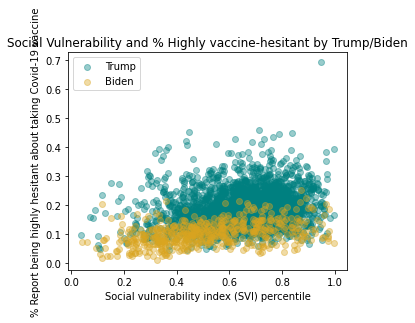

In [51]:
# Uninsured percent and hesitancy percent

fig, ax = plt.subplots(figsize=(5,4))
ctgys = [(1, 'Trump'), (0, 'Biden')]
colors = ['teal', 'goldenrod']
for n in range(2):
    x = df[df['candidate_won'] == ctgys[n][0]]['hh_wgt']
    y = df[df['candidate_won'] == ctgys[n][0]]['pct_highly_hesitant_02-24-22']
    ax.scatter(x, y, c=colors[n], alpha=.4, label=ctgys[n][1])
    ax.legend()
    ax.set_title('Social Vulnerability and % Highly vaccine-hesitant by Trump/Biden')
    ax.set_xlabel('Social vulnerability index (SVI) percentile')
    ax.set_ylabel('% Report being highly hesitant about taking Covid-19 vaccine')
plt.savefig('./Graphs/HesSVIWinner.png')

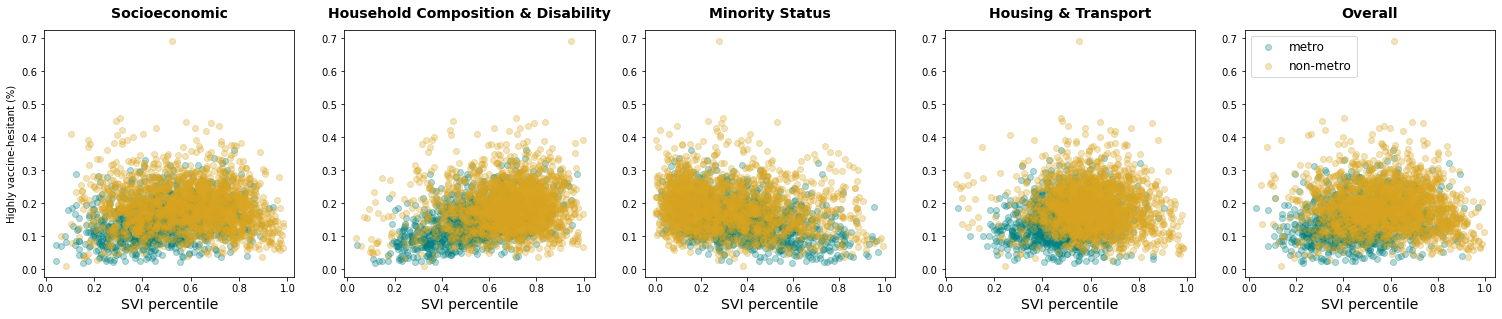

In [52]:
svi = ['socio_wgt', 'hh_wgt', 'minority_wgt', 'housing_wgt', 'overall_wgt']
svi_names = ['Socioeconomic', 'Household Composition & Disability', 'Minority Status', 'Housing & Transport', 'Overall']

{'fontweight': 'bold',
         'fontsize': 14}

fig = plt.figure(figsize=(26,10))
ax = fig.add_subplot(151)
ax.set_title('Social Vulnerability and Vaccine Hesitancy')
        
for i in range(5):
    metro = [(1, 'metro'), (0, 'non-metro')]
    colors = ['teal', 'goldenrod']
    for n in range(2):
        x = df[df['Metro_status'] == metro[n][0]][svi[i]]
        y = df[df['Metro_status'] == metro[n][0]]['pct_highly_hesitant_02-24-22']
        plt.subplot(2,5,i+6).scatter(x, y, c=colors[n], alpha=.3, label=metro[n][1]) 
        plt.title(f'{svi_names[i]}', pad=12, fontdict={'fontweight': 'bold',
         'fontsize': 14})
        plt.xlabel('SVI percentile', fontdict= {'fontsize': 14})
        if i == 0:
            plt.ylabel('Highly vaccine-hesitant (%)')
        if i == 4:
            plt.legend(fontsize='large');

            
# Code from https://stackoverflow.com/questions/6963035/pyplot-common-axes-labels-for-subplots
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
plt.savefig('./Graphs/PlotsSVIMetro.png', facecolor='w', transparent=False, dpi = 1000)

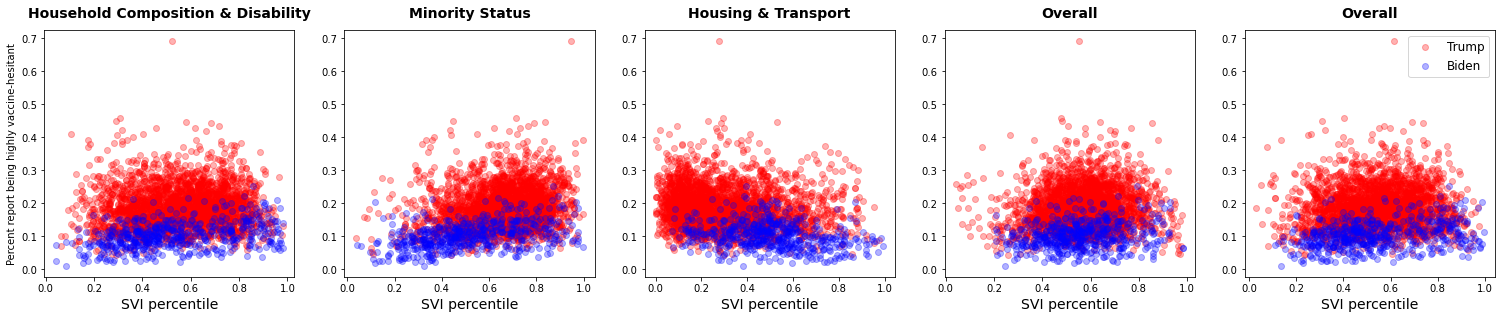

In [53]:
svi = ['socio_wgt', 'hh_wgt', 'minority_wgt', 'housing_wgt', 'overall_wgt']
svi_names = ['Socioeconomic', 'Household Composition & Disability', 'Minority Status', 'Housing & Transport', 'Overall']

{'fontweight': 'bold',
         'fontsize': 14}

fig = plt.figure(figsize=(26,10))
ax = fig.add_subplot(151)
ax.set_title('Social Vulnerability and Vaccine Hesitancy')

for i in range(5):
    candidates = [(1, 'Trump'), (0, 'Biden')]
    colors = ['red', 'blue']
    for n in range(2):
        x = df[df['candidate_won'] == candidates[n][0]][svi[i]]
        y = df[df['candidate_won'] == candidates[n][0]]['pct_highly_hesitant_02-24-22']
        plt.title(f'{svi_names[i]}', pad=12, fontdict={'fontweight': 'bold',
         'fontsize': 14})
        plt.xlabel('SVI percentile', fontdict= {'fontsize': 14})
        plt.subplot(2,5,i+1).scatter(x, y, c=colors[n], alpha=.3, label=ctgys[n][1])
        if i == 0:
            plt.ylabel('Percent report being highly vaccine-hesitant')
        if i == 4:
            plt.legend(fontsize='large')

            
# Code from https://stackoverflow.com/questions/6963035/pyplot-common-axes-labels-for-subplots
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
plt.savefig('./Graphs/PlotsSVIWinner.png', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight')


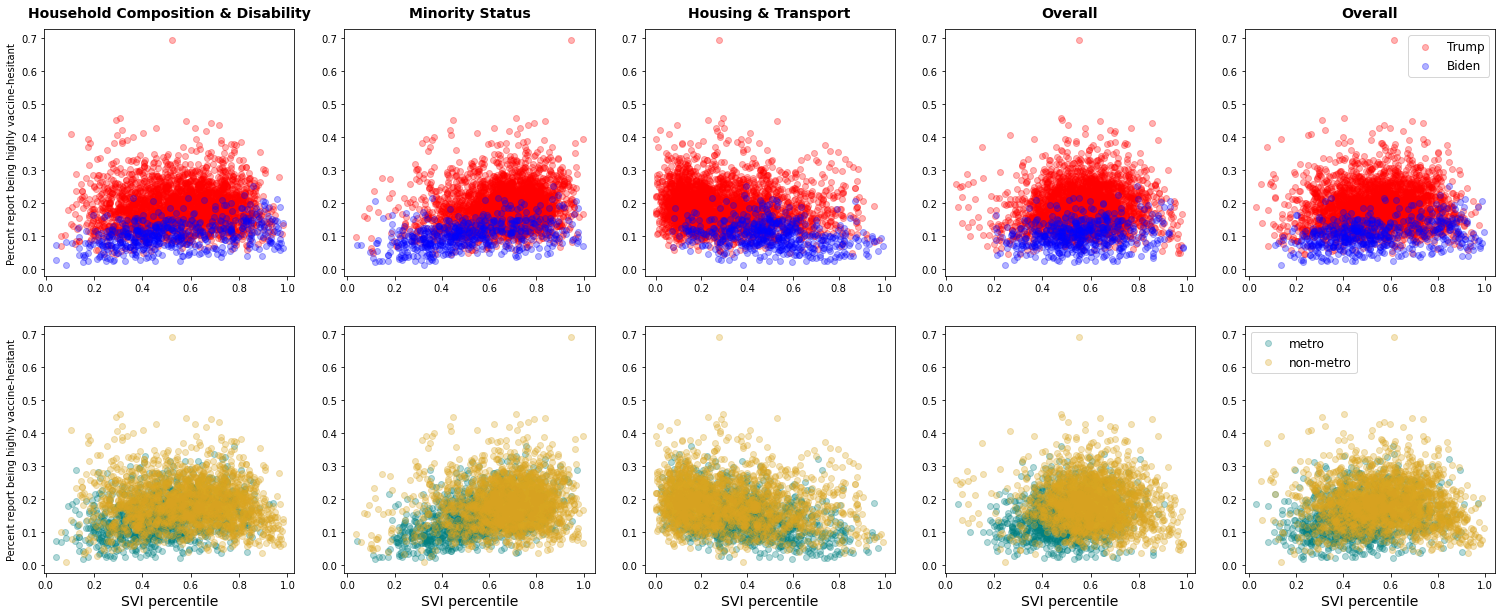

In [54]:
svi = ['socio_wgt', 'hh_wgt', 'minority_wgt', 'housing_wgt', 'overall_wgt']
svi_names = ['Socioeconomic', 'Household Composition & Disability', 'Minority Status', 'Housing & Transport', 'Overall']

{'fontweight': 'bold',
         'fontsize': 14}

fig = plt.figure(figsize=(26,10))
ax = fig.add_subplot(151)
ax.set_title('Social Vulnerability and Vaccine Hesitancy')

for i in range(5):
    candidates = [(1, 'Trump'), (0, 'Biden')]
    colors = ['red', 'blue']
    for n in range(2):
        x = df[df['candidate_won'] == candidates[n][0]][svi[i]]
        y = df[df['candidate_won'] == candidates[n][0]]['pct_highly_hesitant_02-24-22']
        plt.title(f'{svi_names[i]}', pad=12, fontdict={'fontweight': 'bold',
         'fontsize': 14})
        plt.subplot(2,5,i+1).scatter(x, y, c=colors[n], alpha=.3, label=ctgys[n][1])
        if i == 0:
            plt.ylabel('Percent report being highly vaccine-hesitant')
        if i == 4:
            plt.legend(fontsize='large')
        
for i in range(5):
    metro = [(1, 'metro'), (0, 'non-metro')]
    colors = ['teal', 'goldenrod']
    for n in range(2):
        x = df[df['Metro_status'] == metro[n][0]][svi[i]]
        y = df[df['Metro_status'] == metro[n][0]]['pct_highly_hesitant_02-24-22']
        plt.subplot(2,5,i+6).scatter(x, y, c=colors[n], alpha=.3, label=metro[n][1])  
        plt.xlabel('SVI percentile', fontdict= {'fontsize': 14})
        if i == 0:
            plt.ylabel('Percent report being highly vaccine-hesitant')
        if i == 4:
            plt.legend(fontsize='large');

            
# Code from https://stackoverflow.com/questions/6963035/pyplot-common-axes-labels-for-subplots
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
plt.savefig('./Graphs/PlotsHes_WinnerSVI.png')


In [55]:
# svi correlations with vax benchmarks

# drop counties with no data
drop = df[(df['Dose1_Pop_Pct_030122'] > 0) & (df['Dose1_Pop_Pct_090121'] > 0)].copy()

#sns.pairplot(drop, x_vars = ['uninsured_pct', 'socio_wgt', 'hh_wgt', 'minority_wgt', 'housing_wgt', 'overall_wgt'], y_vars = ['Dose1_Pop_Pct_030121', 'Dose1_Pop_Pct_090121', 'Series_Complete_Pop_Pct_090121', 'Dose1_Pop_Pct_030122',
  #     'Series_Complete_Pop_Pct_030122', 'Booster_Doses_Vax_Pct_030122'], hue = 'pct_trump')

In [56]:
drop.shape, df.shape

((2709, 33), (3138, 33))

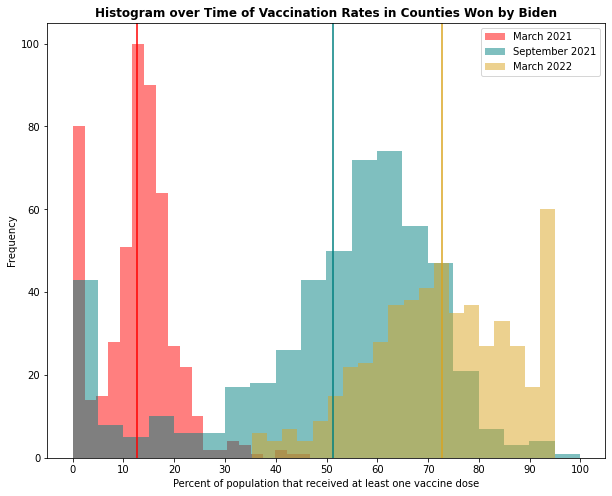

In [68]:
trump = df[(df['candidate_won'] == 1) & (df['Dose1_Pop_Pct_030122'] > 0)]
biden = df[(df['candidate_won'] == 0) & (df['Dose1_Pop_Pct_030122'] > 0)]

#fig, axs = plt.subplots(2,1, sharex=True)
plt.figure(figsize=(10,8))
plt.hist(biden['Dose1_Pop_Pct_030121'], label='March 2021', alpha=.5, bins=20, color='red')
plt.axvline(biden['Dose1_Pop_Pct_030121'].mean(), color='red')
plt.hist(biden['Dose1_Pop_Pct_090121'], label='September 2021', alpha=.5, bins=20, color='teal')
plt.axvline(biden['Dose1_Pop_Pct_090121'].mean(), color='teal')
plt.hist(biden['Dose1_Pop_Pct_030122'], label='March 2022', alpha=.5, bins=20, color='goldenrod')
plt.axvline(biden['Dose1_Pop_Pct_030122'].mean(), color='goldenrod')
plt.xticks(range(0, 110, 10))
plt.legend()
plt.title('Histogram over Time of Vaccination Rates in Counties Won by Biden', fontweight= 'bold')
plt.xlabel('Percent of population that received at least one vaccine dose')
plt.ylabel('Frequency')
plt.savefig('./Graphs/BidenVaxTime.png', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight')

In [ ]:

plt.figure(figsize=(10,8))
plt.hist(trump['Dose1_Pop_Pct_030121'], label='March 2021', alpha=.5, bins=20, color='red')
plt.axvline(trump['Dose1_Pop_Pct_030121'].mean(), color='red')
plt.hist(trump['Dose1_Pop_Pct_090121'], label='September 2021', alpha=.5, bins=20, color='teal')
plt.axvline(trump['Dose1_Pop_Pct_090121'].mean(), color='teal')
plt.hist(trump['Dose1_Pop_Pct_030122'], label='March 2022', alpha=.5, bins=20, color='goldenrod')
plt.axvline(trump['Dose1_Pop_Pct_030122'].mean(), color='goldenrod')
plt.xticks(range(0, 110, 10))
plt.legend()
plt.title('Histogram over Time of Vaccination Rates in Counties Won by Trump', fontweight= 'bold')
plt.xlabel('Percent of population that received at least one vaccine dose')
plt.ylabel('Frequency')
plt.savefig('./Graphs/TrumpVaxTime.png', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight')